# Comment Toxicity Detection
This project is a comment toxicity detection system that uses various parameters such as toxic, severe_toxic, insult, obscene, threat, and identity hate to classify comments.

<img src="images/cyberbullying.jpeg" alt="A Comment Jpeg" width="500" height="250">

## Background

Comments on online platforms can play a crucial role in fostering discussions and building communities. However, the rise of toxic comments poses a significant challenge to maintaining healthy online environments. Toxic comments can include hate speech, insults, or any form of harmful language that can negatively impact users' experiences.

## Project Objective

The primary goal of this project is to develop a comment toxicity analysis model. The model aims to automatically identify and classify comments based on their level of toxicity. By doing so, we can:

- **Foster Healthy Discussions:** Encourage positive and constructive conversations within online communities.
  
- **Enhance User Experience:** Create a safer online environment by filtering out harmful content.

- **Support Moderation Efforts:** Assist content moderators in efficiently managing and maintaining a positive online space.

## Dataset Overview

We are working with a dataset containing a large number of Wikipedia comments, labeled by human raters for toxic behavior. The types of toxicity include toxic, severe_toxic, obscene, threat, insult, and identity_hate. The dataset allows us to build a multi-headed model capable of predicting the probability of each type of toxicity for a given comment.

## Approach

Our approach involves using natural language processing `(NLP)` techniques and machine learning algorithms to analyze and classify comments. We will explore traditional machine learning models and neural network-based models to find the most effective solution for our specific use case.

The step is broken down into the following steps.

- Import dependencies

- Exploring the data set

- Preparing the data

- Preprocess

- Create sequential model using keras

- Making prediction

- Evaluate model

- Test and Implementaion of the gradio app

## Import dependencies

In [3]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

# libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading dataframe and converting to a pandas df
path = "sample_data/train.csv"

dataFrame =  pd.read_csv(path)

In [5]:
# displaying the data (6 random rows)
dataFrame.sample(6)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
68733,b7d9f22fd017b526,"Biological hazards (electric eels, snakes, pir...",0,0,0,0,0,0
111303,53736c15c5cac463,Now this was a true hero!,0,0,0,0,0,0
11240,1dbe1d2e77132d39,"""\n\n Glen Campbell \n\nI don't know if this w...",0,0,0,0,0,0
82532,dccad920507292a9,"learn to write a warning \n\nfor User Talk, pl...",0,0,0,0,0,0
88874,edc52f27a5160e75,"Reading, and fixing some of the minor issues. ...",0,0,0,0,0,0
55525,9463112a59369078,Tiptoety your judgemts seems to consits of he;...,1,0,0,0,0,0


## Exploring the dataset

In [6]:
# Displaying the number of columns the dataFrame has
print("The dataframe has",len(dataFrame.columns),"columns")

dataFrame.columns

The dataframe has 8 columns


Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')



- `id`: A unique identifier for each comment in the dataset.

- `comment_text`: The actual content of the comments provided by users on online platforms.

- `toxic`: A binary label indicating whether the comment exhibits toxic behavior (1 for toxic, 0 for non-toxic).

- `severe_toxic`: A binary label indicating whether the comment contains severely toxic content (1 for severe toxicity, 0 for non-severe toxicity).

- `obscene`: A binary label indicating whether the comment is obscene or offensive (1 for obscene, 0 for non-obscene).

- `threat`: A binary label indicating whether the comment contains threats or hostile language (1 for threat, 0 for non-threat).

- `insult`: A binary label indicating whether the comment is insulting or disrespectful (1 for insult, 0 for non-insult).

- `identity_hate`: A binary label indicating whether the comment involves identity-based hate (1 for identity hate, 0 for non-identity

> The dataset contains over 159,000 responses

In [7]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


**Memory Usage:**
The dataset consumes approximately 11.0 MB of memory.

**Non-Null Count:**
All columns have a non-null count of 159,571, indicating that there are no missing values in any column.

**Target Variables:**
The columns `toxic`, `severe_toxic`, `obscene`, `threat`, `insult`, and `identity_hate`

**Textual Data:**
The `comment_text` column contains the actual text content of the comments.

**Comment Length:**
The `comment_length` column represents the length (number of characters) of each comment.


In [8]:
# Display basic statistics about the dataset
dataFrame.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**toxic, severe_toxic, obscene, threat, insult, identity_hate:**

  - **Mean:** The mean values for these columns represent the proportion of comments exhibiting each type of toxicity. For example, the mean for 'toxic' is `0.0958`, suggesting that approximately 9.58% of comments are toxic.
  
  - **Standard Deviation (std):** The standard deviation provides a measure of the spread or variability in the data. Higher values indicate more variability.

**comment_length:**
  
  - **Mean:** The mean comment length is `394.07` characters.
  
  - **Standard Deviation (std):** The standard deviation for comment length is `590.72`, indicating a wide range of comment lengths.
  
  - **Min/Max:** The minimum comment length is `6` characters, and the maximum is `5000` characters.
  
  - **Percentiles (25%, 50%, 75%):** These values help understand the distribution of comment lengths. For example, 25% of comments have a length of `96` characters or less, 50% have a length of `205` characters or less, and 75% have a length of `435` characters or less.

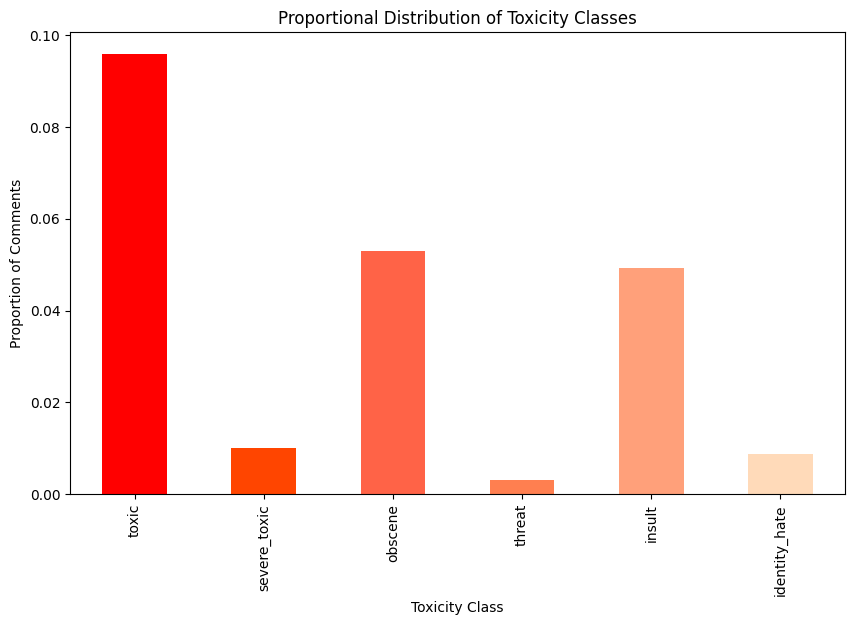

In [9]:
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
colors = ['#FF0000', '#FF4500', '#FF6347', '#FF7F50', '#FFA07A', '#FFDAB9']

# Calculate the proportion of each toxicity class
toxicity_proportions = dataFrame[toxicity_columns].sum() / len(dataFrame)

plt.figure(figsize=(10, 6))
toxicity_proportions.plot(kind='bar', color=colors)
plt.title('Proportional Distribution of Toxicity Classes')
plt.xlabel('Toxicity Class')
plt.ylabel('Proportion of Comments')
plt.show()


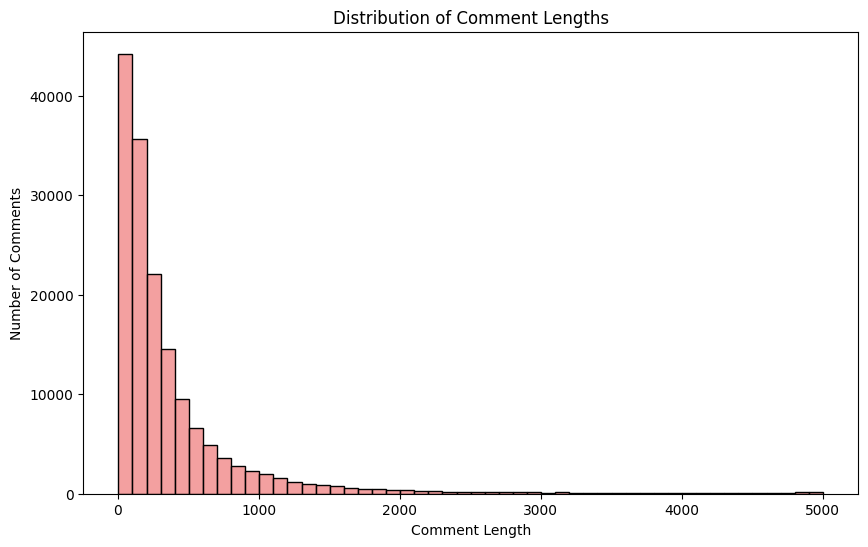

In [10]:

# Visualize the distribution of comment lengths
dataFrame['comment_length'] = dataFrame['comment_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(dataFrame['comment_length'], bins=50, color='lightcoral')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.show()


In [11]:
# Displaying a random sample of comments
print("Random Sample of Comments:")
print(dataFrame['comment_text'].sample(5).values)


Random Sample of Comments:
['dont u speak to me like that id advise u to watch ur mouth!!'
 "Raymond arritt\n\nThis is not an accident \n\nSome of the sections/articles on Kambojas, as being edited and altered by Debachmann, are getting utterly confusing and more messier, and, I'm afraid, may lead to erroneous conclusions by the readers. As he has started editing/altering them en mass, either he should improve the articles by editing them suitably so as to keep them clear, logical and readable and at the same time, also maintain/keep intact their integrity and factuality (let's us if he can do it), or else, I will have no alternative except to revert them back to their original versions. For example, the article Language and ethnicity of Kambojas, in its current form which he has edited, is utterly terrible. I don't think he and other editors on kamboj articles of his kind are quite familiar with the Kamboj history, so as to render them a justice. Further, please make a note that, none

In [12]:
# droping the comment_length column from your DataFrame

dataFrame = dataFrame.drop(columns=['comment_length'])

In [13]:
dataFrame.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

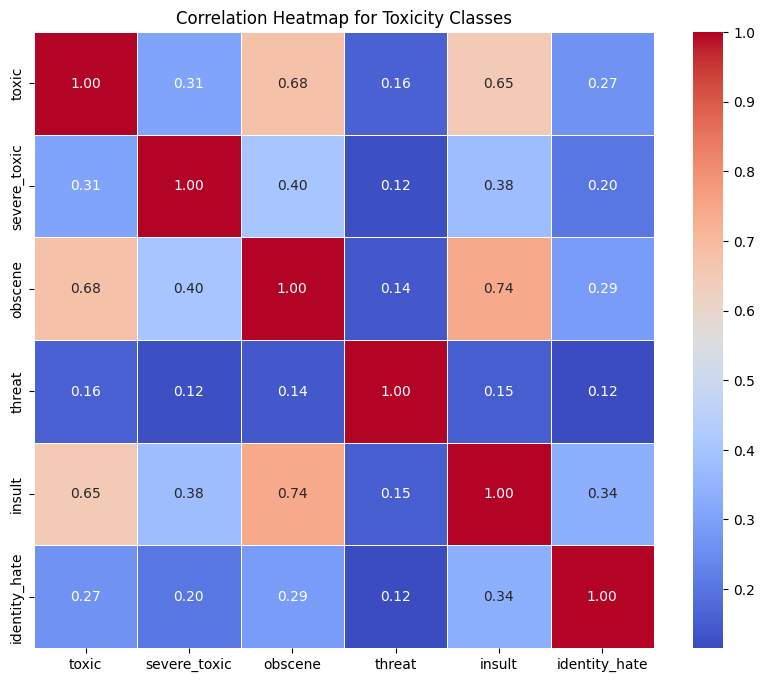

In [14]:
# Select relevant columns for correlation analysis
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
correlation_data = dataFrame[toxicity_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Toxicity Classes')
plt.show()

**Toxic and Obscene:**
The correlation between 'toxic' and 'obscene' is relatively high (0.68), suggesting a strong positive relationship. Comments classified as toxic are likely to also be labeled as obscene.

**Toxic and Insult:**
There is a significant positive correlation (0.65) between 'toxic' and 'insult.' Comments labeled as toxic often contain insulting language.

**Obscene and Insult:**
The correlation between 'obscene' and 'insult' is high (0.74), indicating a strong positive association. Comments classified as obscene are likely to also be insulting.

**Toxic and Severe Toxic:**
The correlation between 'toxic' and 'severe_toxic' is moderate (0.31). While there is a positive relationship, it is not as strong as the correlations observed with 'obscene' and 'insult.'

**Identity Hate and Other Classes:**
The correlations involving 'identity_hate' are generally lower compared to other pairs. For instance, the correlation between 'identity_hate' and 'toxic' is 0.27.

**Threat and Other Classes:**
'Threat' shows relatively low correlations with other toxicity classes, indicating that threats may not always be strongly associated with other forms of toxicity.


## Preprocessing

In [15]:
# importing the text vectorization layer to tokenize our text

from tensorflow.keras.layers import TextVectorization

In [16]:
TextVectorization?

> A preprocessing layer which maps text features to integer sequences. That is if we take a word it can give a value represent that word

In [17]:
# Splitting the data into comment and value

comment_ = dataFrame['comment_text']

targetToxicity_values = dataFrame[dataFrame.columns[2:]].values # convering into a numpy array

In [18]:
# Displaying to see the result

comment_

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [19]:
targetToxicity_values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [20]:
targetToxicity_values.shape

(159571, 6)

In [21]:
# variable to hold the max numb of word
Max_word =  200000

In [22]:
vectorizer = TextVectorization(max_tokens=Max_word,output_sequence_length = 1800, output_mode = 'int')

*The text vectorizer is configured to convert input text data into numerical vectors, where each vector has a fixed length of 1800, and the words are represented as integer values.*

*This process is crucial for feeding textual data into machine learning models that require numerical input. Adjusting parameters like max_tokens allows control over the vocabulary size considered during vectorization.*

In [23]:
# Vectorizing our vocabulary (comment)

vectorizer.adapt(comment_.values) # .values is making it a numpy array

In [24]:
# Texting the vectorizer

vectorizer("This is fun, It's a lovely project")[:7]

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([  14,    9, 1089,   48,    6, 5490,  463])>

- The given TensorFlow tensor is a one-dimensional array with a shape of (7,) and integer data type. The elements of the array are [14, 9, 1089, 48, 6, 5490, 463]. Each number in the array represents an integer value, and the array has a length of 7 elements. For example, the first element is 14, the second element is 9, and so on. This tensor could be part of the output or representation of data in a TensorFlow-based model, where numerical values are used to encode information for further processing in a machine learning context.


In [25]:
# Doing for all our text in the dataframe

vectorizer_allText = vectorizer(comment_.values)

In [26]:
# calling var

vectorizer_allText

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

The TensorFlow tensor has a shape of (159571, 1800), indicating it is a 2D array with 159,571 rows and 1800 columns. (Where row == dataFrame row)

Each element in the array is an integer, representing the encoded numerical vector for a corresponding text in the dataset.

The values in the array result from text vectorization, converting each comment into a fixed-length numerical sequence of length 1800 (will pad out the remaining with 0).

The numerical vectors are padded with zeros to match the specified output sequence length. This tensor is a crucial representation of the entire text dataset, for input into machine learning models.

In [27]:
# Creating a tensorflow data pipeline

dataset =  tf.data.Dataset.from_tensor_slices((vectorizer_allText,targetToxicity_values))

dataset = dataset.cache()

dataset = dataset.shuffle(160000)

dataset = dataset.batch(16) # series of 16 samples

dataset =  dataset.prefetch(8)


##### TensorFlow Data Pipeline Explanation

1. **Creating Dataset:**
   - The initial step involves creating a TensorFlow Dataset using `tf.data.Dataset.from_tensor_slices`. This function slices the provided tensors (`vectorizer_text` containing text vectors and `targetToxicity_values` containing target labels) into a dataset of pairs.

2. **Caching:**
   - The `cache()` method is applied to the dataset, allowing TensorFlow to cache elements in memory for faster access during subsequent iterations. This is beneficial for optimizing data loading performance.

3. **Shuffling:**
   - The `shuffle(160000)` operation shuffles the dataset, randomizing the order of its elements. This is important for introducing variability during training and preventing the model from learning patterns based on the order of the data.

4. **Batching:**
   - The `batch(16)` operation groups consecutive elements of the dataset into batches of 16 samples. This is useful for processing multiple samples in parallel, especially during model training.

5. **Prefetching:**
   - The `prefetch(8)` operation prefetches batches of data to be processed by the model. Specifying a prefetch buffer size of 8 allows for overlapping data loading and model training, reducing potential data processing bottlenecks.




In [28]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [29]:
dataset.as_numpy_iterator().next()

(array([[   31,   420, 29824, ...,     0,     0,     0],
        [   13, 76344,  2084, ...,     0,     0,     0],
        [  443,  5459,   443, ...,     0,     0,     0],
        ...,
        [   13,  2366,     1, ...,     0,     0,     0],
        [  312,    76,     2, ...,     0,     0,     0],
        [  578,    76,  2347, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [30]:
batchcomment_ , batch_targetToxicity_values = dataset.as_numpy_iterator().next()

In [31]:
batch_targetToxicity_values.shape

(16, 6)

In [32]:
batchcomment_.shape

(16, 1800)

In [33]:
len(dataset)

9974

In [34]:
# Creating Training, Validation, and Test Partitions

train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

The provided code is responsible for partitioning the dataset into training, validation, and test sets.

1. **Training Set:**
   - `train = dataset.take(int(len(dataset)*.7))`
     - The training set (`train`) is created by taking the first 70% of the dataset. The `take` method extracts a portion of the dataset based on the specified percentage.

2. **Validation Set:**
   - `val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))`
     - The validation set (`val`) is formed by skipping the training portion (first 70%) and then taking the next 20% of the dataset. This ensures a non-overlapping partition for model validation.

3. **Test Set:**
   - `test = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.1))`
     - The test set (`test`) is created by skipping both the training and validation portions and then taking the final 10% of the dataset. This establishes a distinct dataset for evaluating the model's performance.


In [35]:
len(train)

6981

In [36]:
len(val)

1994

In [37]:
len(test)

997

In [38]:
train_generator = train.as_numpy_iterator()
train_generator.next()

(array([[    8,   550,   138, ...,     0,     0,     0],
        [  312,     8,    44, ...,     0,     0,     0],
        [ 1723,    11, 95596, ...,     0,     0,     0],
        ...,
        [ 1586,   433,    37, ...,     0,     0,     0],
        [59221, 42994,   278, ...,     0,     0,     0],
        [   18,   129,    18, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0]]))

# Create Sequential Model

In [39]:
# installing dependencies

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

**The first aspect is working on the embedding.**

> The embedding layer refines the initial numerical representations of words, generated through techniques like text vectorization. While the initial representations are basic indices or one-hot encodings, the embedding layer transforms them into dense vectors with continuous values.

> > Think of the embedding layer as a translator for words in the computer's language. It takes raw words, like "dog" or "happy," and turns them into special numbers. These numbers capture the meaning and context of each word, helping the computer understand relationships between them. Just like a translator helps you understand different languages, the embedding layer helps the computer make sense of words in a way that's useful for solving problems or making predictions

In [40]:
model = Sequential()
# Creating the embedding layer
model.add(Embedding(Max_word+1, 32))
# Creating the Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid')) # Using a sigmoid activation

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [43]:
len(train)

6981

In [44]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 12816s 2s/step - loss: 0.0624 - val_loss: 0.0475


In [45]:
history.history

{'loss': [0.06238790228962898], 'val_loss': [0.04754268378019333]}

<Figure size 800x500 with 0 Axes>

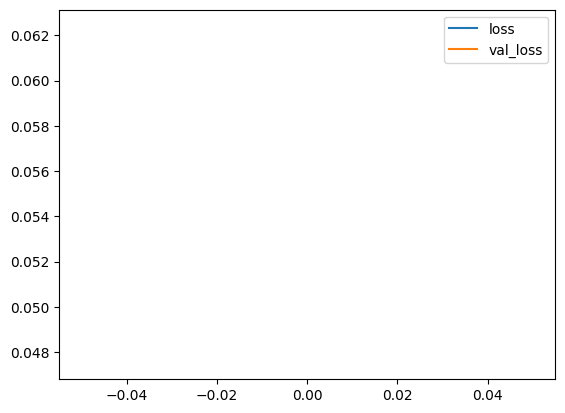

In [46]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

**Training History Visualization Clarification:**

The absence of a line in the training history plot may be attributed to the model being trained for only one epoch. In machine learning, an epoch represents one complete pass through the entire training dataset. With just a single epoch, there might not be enough iterations for the model to learn and exhibit significant changes in performance metrics. To observe meaningful trends and patterns, it is recommended to train the model for more epochs. Consider increasing the number of epochs in the `model.fit` function (e.g., `epochs=10`) before visualizing the training history. This will provide a clearer depiction of the model's learning process over multiple iterations.


## Making Predictions

In [47]:
# Getting some text and running it through the vectoriser

input_comment = vectorizer("You are the weirdest person i have ever seen in my entire life")

In [48]:
input_comment

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([ 7, 20,  2, ...,  0,  0,  0])>

In [49]:
res = model.predict(np.expand_dims(input_comment,0))

1/1 [==============================] - 1s 966ms/step


In [50]:
print(dataFrame.columns[2:])

res

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')


array([[0.1802311 , 0.00131125, 0.01966264, 0.00488022, 0.03483836,
        0.00941555]], dtype=float32)

In [51]:
# Getting some text and running it through the vectoriser

input_comment = vectorizer("I will kill you")

In [52]:
val = res = model.predict(np.expand_dims(input_comment,0))

1/1 [==============================] - 0s 146ms/step


In [53]:
val

array([[0.6495885 , 0.01281933, 0.2113929 , 0.01799192, 0.27383608,
        0.05832691]], dtype=float32)

In [54]:
batch = test.as_numpy_iterator().next()

In [55]:
batch_x , batch_y = test.as_numpy_iterator().next()

In [56]:
(model.predict(batch_x) > 0.5).astype(int)

1/1 [==============================] - 0s 319ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [57]:
(model.predict(batch_y) > 0.5).astype(int)

1/1 [==============================] - 1s 1s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

> This representation provides a concise summary of the distribution and characteristics of different toxicity classes within the sentence.


## Evaluating The Model

In [58]:
# Using binary classification to evaluate the model

from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [59]:
# instantiating the metrics

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [60]:
# Looping through every single batch in the data pipeline

for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 365ms/step
Precision: 0.8705463409423828, Recall:0.6211864352226257, Accuracy:0.4704112410545349


**Model Evaluation:**

This code evaluates the model's performance on the test dataset using precision, recall, and categorical accuracy metrics. It iterates through the test dataset, makes predictions, and updates the evaluation metrics. The final results provide insights into the precision, recall, and overall accuracy of the model.

>  Increasing the number of epochs might lead to improved performance as the model learns more from the data. But the runtime will be larger and that depends on the architecture of the machine in use

## Integrating the model into a gradio app

In [62]:
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.6 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 

In [2]:
import gradio as gr
import tensorflow as tf

In [65]:
model.save("Toxicity.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
model = tf.keras.models.load_model("Toxicity.h5")

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


TypeError: Error when deserializing class 'Embedding' using config={'name': 'embedding', 'trainable': True, 'dtype': 'float32', 'input_dim': 200001, 'output_dim': 32, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': None, 'input_shape': [None, None]}.

Exception encountered: Unrecognized keyword arguments passed to Embedding: {'input_length': None}

In [67]:
input_str = vectorizer("Hey, I freaken hate you!")

In [68]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 2s 2s/step


In [69]:
res

array([[0.60838044, 0.01197092, 0.1861221 , 0.01797181, 0.25422353,
        0.05713314]], dtype=float32)

In [72]:
input_str = vectorizer("God bless you")

In [73]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 274ms/step


In [74]:
res

array([[0.05000574, 0.00038452, 0.00455932, 0.00201796, 0.00634137,
        0.00274267]], dtype=float32)



The code below defines a function called `score_comment(comment)` that takes a single argument `comment`. This function is designed to evaluate the sentiment of the provided comment using a machine learning model.

1. `vectorized_comment = vectorizer([comment])`: This line vectorizes the input comment using a pre-trained vectorizer object called `vectorizer`. It converts the comment into a format that can be understood by the machine learning model.

2. `results = model.predict(vectorized_comment)`: Here, the vectorized comment is passed into a machine learning model called `model` for prediction. The model predicts the sentiment of the comment, indicating whether it is positive or negative.

3. A loop iterates over each column in the dataframe (`df`) starting from the third column (`df.columns[2:]`). For each column, it checks if the prediction result for that column is greater than 0.5. If it is, it appends the column name along with the prediction result to the `text` string.

4. Finally, the function returns the `text` string containing the prediction results for each column in the dataframe.



In [91]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(dataFrame.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.06)

    return text

In [105]:
desc = """Welcome to our Comment Toxicity Analyzer!

This app provides you with a platform to analyze the toxicity of comments. We understand the importance of creating a safe and respectful online community, which is why we're dedicated to helping you identify and address toxic comments effectively.

Sit back, relax, and let our powerful algorithms analyze the comments for toxicity. Whether it's identifying severe toxic behavior, obscenities, threats, insults, or identity-based hate speech, our tool has got you covered.

Thank you for choosing our app. We hope you have a meaningful and constructive experience!

Meanings:
- "Toxic": Comments containing elements of toxicity or negativity.
- "Severe Toxic": Comments with highly toxic content that may pose a significant risk to others.
- "Obscene": Comments containing offensive or inappropriate language or content.
- "Threat": Comments containing threats of harm or violence towards others.
- "Insult": Comments intended to offend or belittle others.
- "Identity Hate": Comments containing hate speech targeted towards specific groups based on their identity.
"""
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                         title="COMMENT TOXICITY DETECTION APPLICATION",
                         description=desc,
                         theme="light",
                         outputs='text'
                         )



/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:584: UserWarning: Cannot load light. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/light (Request ID: Root=1-66141a3b-38d1f4e12017d3897be3445e;f3617b6c-1815-4357-a93c-2614fa3eb7e7)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


In [106]:

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://576db1477388c046a6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
